In [1]:
import numpy as np
import pandas as pd

In [2]:
x1 = np.random.uniform(0,1,20000)
x2 = np.random.uniform(0,1,20000)

# noise
x3 = np.random.uniform(0,1,20000)
x4 = np.random.uniform(0,1,20000)

### Create Drifts
One incremntal drift:

Start @ [5000]: changes x1 and x2. They are now drawn from np.random.uniform(0,1+i) with i = 1
After every 1000 datapoints i += 1.
Stop when i = 10

In [3]:
#x1[2000:3000]=np.random.uniform(1,2,1000)
#x2[2000:3000]=np.random.uniform(1,2,1000)

j = 0
for i in range(1,10):
    x1[5000+j:6000+j]=np.random.uniform(0,1+i,1000)
    x2[5000+j:6000+j]=np.random.uniform(0,1+i,1000)

    j += 1000

y= np.where(x2 > np.sin(x1), np.ones(20000, dtype=np.int8), np.zeros(20000, dtype=np.int8))



In [4]:
data = pd.DataFrame([x1,x2,x3,x4,y]).transpose()
data.columns = ['x1','x2','x3','x4', 'y']
data['y'] = data['y'].astype('int32')

In [5]:
data

,x1,x2,x3,x4,y
0,0.578066,0.168888,0.454414,0.760384,0
1,0.502488,0.948660,0.518272,0.310305,1
2,0.760082,0.889345,0.572254,0.642223,1
3,0.901964,0.224870,0.254554,0.474298,0
4,0.741448,0.209886,0.058050,0.573225,0
...,...,...,...,...,...
19995,0.099822,0.806873,0.089177,0.888816,1
19996,0.787939,0.471434,0.165389,0.395390,0
19997,0.288462,0.832928,0.134502,0.043104,1
19998,0.765189,0.186237,0.835964,0.822633,0


In [6]:
data.to_csv('sin_classification_incremental_drift.csv', index=False)

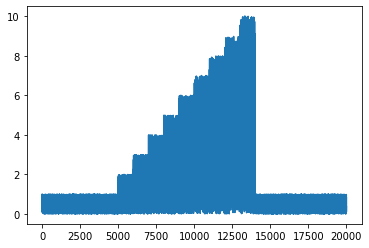

In [7]:
import matplotlib.pyplot as plt
plt.plot(data['x1'])

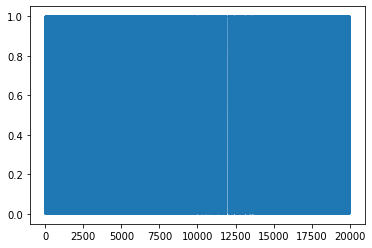

In [8]:
import matplotlib.pyplot as plt
plt.plot(data['y'])

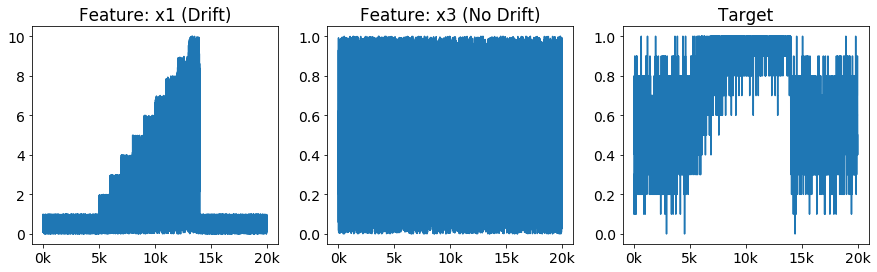

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Plot features
font = {'size'   : 14}

plt.rc('font', **font)


fig, ax = plt.subplots(1, 3, figsize=(15,4))


ax[0].plot(data['x1'])
ax[0].set_title('Feature: x1 (Drift)')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))


ax[1].plot(data['x3'])
ax[1].set_title('Feature: x3 (No Drift)')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))

ax[2].plot(data['y'].rolling(10).mean())
ax[2].set_title('Target')
ax[2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))



plt.savefig('sine_incremental.png', bbox_inches='tight', dpi=300)

In [17]:
int(5000/1000)

5